In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Access the data and target arrays
X = mnist.data   # Input features (images)
y = mnist.target # Target labels (digits)

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training set is used to train the model's parameters. Development set is used to fine-tune the model's
# hyperparameters, which are settings that determine the behaviours of the learning algorithm but are not learned from
# the data. By evaluating the model's performance on the development set, you can experiment with different 
# hyperparameter configurations and select the best one.
# Development set also prevents overfitting.
# The test set is used to evaluate the final model's performance after all the development and fine-tuning steps.

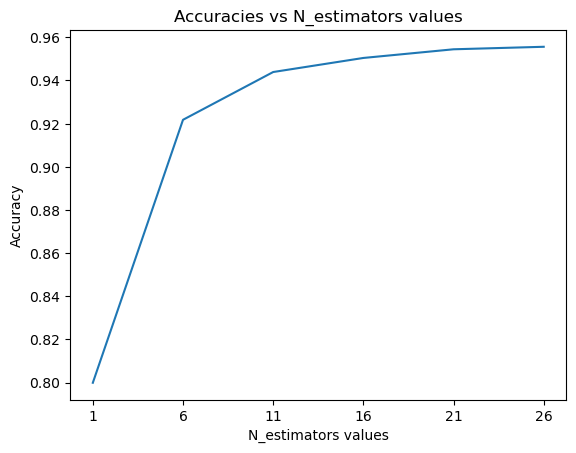

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Exploring the effects of hyperparameter tuning - n_estimators for random forrests
# Each time you conduct hyperparameter tuning you need to re-fit the model - this allows you to evaluate the impact
# of your changes
# Set the range from 1-10 number of estimators

estimators_num = range(1,30, 5)

estimators_scores = [] 
for d in estimators_num:
  rf = RandomForestClassifier(n_estimators=d, random_state=42)
  rf.fit(X_train, y_train)
  score = rf.score(X_dev, y_dev)
  estimators_scores.append(score)

fig, ax = plt.subplots()
ax.plot(estimators_num, estimators_scores)
plt.xlabel("N_estimators values")
plt.ylabel("Accuracy")
plt.title('Accuracies vs N_estimators values')
ax.xaxis.set_ticks(estimators_num)
plt.show()

As you can see, accuracy plateaus after a value of 11 for n_estimators; I will set this as the value for the parameter for testing on the test data.

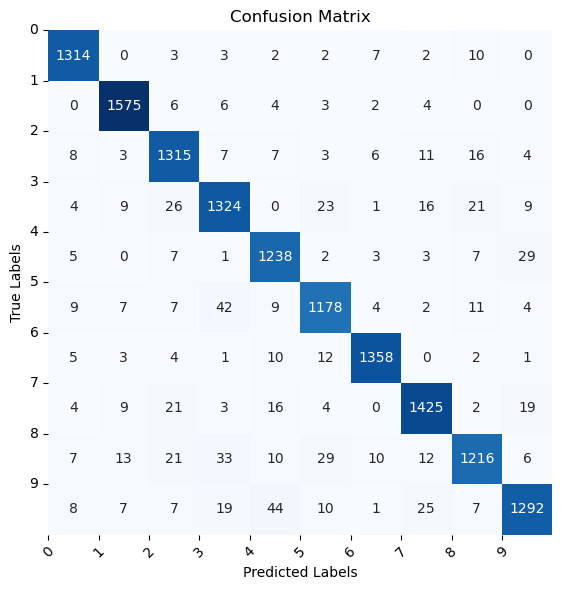

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Chose an n_estimator value of 11 from hyperparameter tuning above
rf = RandomForestClassifier(n_estimators=11)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
# Class labels of 0-9 as the MNIST dataset only contains those digits
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Create a heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.set_xticks(range(len(class_labels)))
ax.set_yticks(range(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Confusion matrix above shows that the class of 5 was the hardest to predict as it has the lowest number of true predicted labels (1178).

In [21]:
# Accuracy, precision and recall score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average = 'weighted')
print("Precision:", precision)

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average = 'weighted')
print("Recall:", recall)

Accuracy: 0.9453571428571429
Precision: 0.9454028374868462
Recall: 0.9453571428571429
